# TP : Dosage par conductimétrie d'une solution de chlorure d'ammonium

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

## Réaction de titrage

La réaction chimique de titrage est la suivante :
$$\text{NH}_4^+ + \text{HO}^{-} = \text{NH}_3 + \text{H}_2\text{O}$$

qui est bien sûr quantitative, rapide, unique mais dont l'équivalence n'est pas facilement repérable (pas de changement de couleur, saut de pH faible,...)</br>

On utilisera donc la conductimétrie qui, a travers la loi de Kolraush, permet de relier la conductivité d'une solution à sa concentration : 
$$\sigma = \sum_{i\in \text{ions}}\Lambda_i^\circ C_i$$

Dans la situation présente, compte-tenu des ions mis en jeu et de la valeur de leur conductivité molaire ionique, on devrait obtenir deux droites,l'une faiblement décroissante et l'autre plus fortement croissante.</br>

#### Remarque
Les précisions associées aux diverses verreries utilisées sont issues des sites web suivants : 
* https://www.aqualabo.fr/burette-graduee-avec-robinet-verre-1-10-25-ml-b381.html
* https://www.dutscher.com/frontoffice/product?produitId=0M-06-03


### Titrage du chlorure d'ammonium

In [2]:
V0 = 105
u_V0 = 5
V = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
u_V = np.array(len(V)*[0.1])
sigma = np.array([1.340, 1.310, 1.270, 1.240, 1.210, 1.180, 1.150, 1.130, 1.110, 1.090, 1.120, 1.230, 1.390, 1.560, 1.730, 1.90, 2.07, 2.24, 2.413, 2.560, 2.72])
u_sigma = np.array(len(sigma)*[.0005])

sigma_plus=[]
u_sigma_plus=[]
for j in range(len(sigma)) :
    sigma_temp=[]
    for i in range(100000):
        sigma_temp.append((sigma[j]+u_sigma[j]*np.random.uniform(-1,1))*(V[j]+u_V[j]*np.random.uniform(-1,1)+V0+u_V0*np.random.uniform(-1,1))/(V0+u_V0*np.random.uniform(-1,1)))
    sigma_plus.append(np.mean(sigma_temp))
    u_sigma_plus.append(np.std(sigma_temp, ddof=1))

### Tracé des données expérimentales

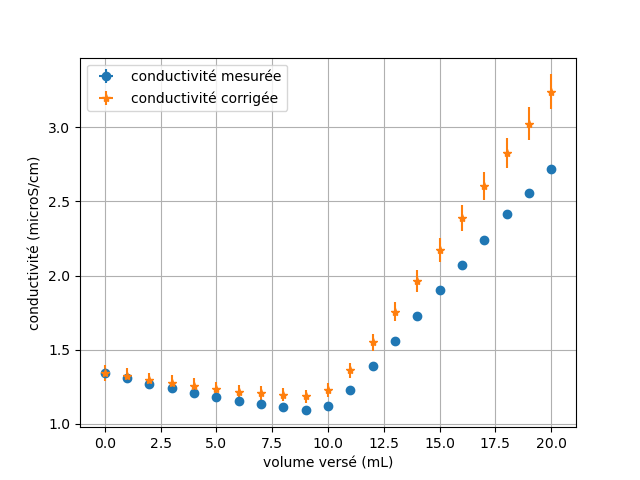

In [3]:
plt.figure()
plt.errorbar(V, sigma, xerr=u_V, yerr = u_sigma, fmt='o' ,label="conductivité mesurée")
plt.errorbar(V, sigma_plus, xerr=u_V, yerr = u_sigma_plus, fmt='*' ,label="conductivité corrigée")
plt.xlabel("volume versé (mL)")
plt.ylabel("conductivité (microS/cm)")
plt.grid(True)
plt.legend()
plt.show()

### Calcul des régressions linéaires

In [4]:
a11_store = []
b11_store = []
a21_store = []
b21_store = []
a12_store = []
b12_store = []
a22_store = []
b22_store = []
for i in range(100000):
    x=V+np.random.uniform(-1,1,len(V))*u_V
    # avant équivalence
    y11=sigma[:9]
    z11=np.polyfit(x[:9], y11, 1)
    a11_store.append(z11[0])
    b11_store.append(z11[1])
    y21=sigma_plus[:9]
    z21=np.polyfit(x[:9], y21, 1)
    a21_store.append(z21[0])
    b21_store.append(z21[1])
    # après équivalence
    y12=sigma[11:]
    z12=np.polyfit(x[11:], y12, 1)
    a12_store.append(z12[0])
    b12_store.append(z12[1])
    y22=sigma_plus[11:]
    z22=np.polyfit(x[11:], y22, 1)
    a22_store.append(z22[0])
    b22_store.append(z22[1])

a11_fit = np.mean(a11_store)
u_a11_fit = np.std(a11_store, ddof=1)
b11_fit = np.mean(b11_store)
u_b11_fit = np.std(b11_store, ddof=1)
a21_fit = np.mean(a21_store)
u_a21_fit = np.std(a21_store, ddof=1)
b21_fit = np.mean(b21_store)
u_b21_fit = np.std(b21_store, ddof=1)

a12_fit = np.mean(a12_store)
u_a12_fit = np.std(a12_store, ddof=1)
b12_fit = np.mean(b12_store)
u_b12_fit = np.std(b12_store, ddof=1)
a22_fit = np.mean(a22_store)
u_a22_fit = np.std(a22_store, ddof=1)
b22_fit = np.mean(b22_store)
u_b22_fit = np.std(b22_store, ddof=1)

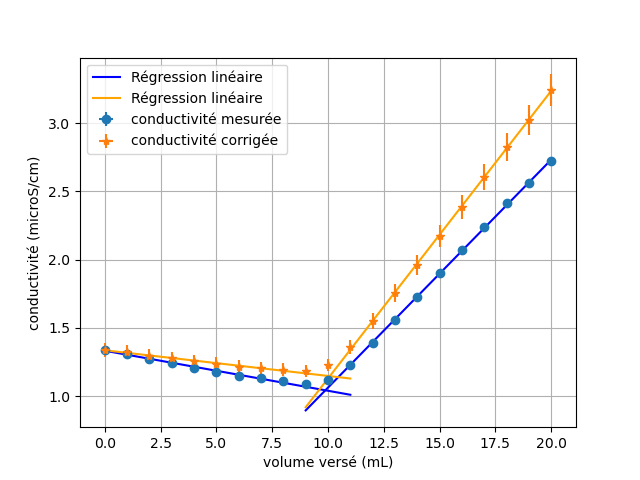

In [5]:
plt.figure()
plt.errorbar(V, sigma, xerr=u_V, yerr = u_sigma, fmt='o' ,label="conductivité mesurée")
plt.errorbar(V, sigma_plus, xerr=u_V, yerr = u_sigma_plus, fmt='*' ,label="conductivité corrigée")
plt.plot(V[:12], a11_fit*V[:12]+b11_fit, color='blue', label="Régression linéaire")
plt.plot(V[9:], a12_fit*V[9:]+b12_fit, color='blue')
plt.plot(V[:12], a21_fit*V[:12]+b21_fit, color='orange', label="Régression linéaire")
plt.plot(V[9:], a22_fit*V[9:]+b22_fit, color='orange')
plt.xlabel("volume versé (mL)")
plt.ylabel("conductivité (microS/cm)")
plt.grid(True)
plt.legend()
plt.show()

### Calcul du volume équivalent
Le volume équivalent se déduit de l'intersection entre les deux courbes de même couleur, soit en calculant : 
$$V_\text{eq}=-\dfrac{b_{11}-b_{12}}{a_{11}-a_{12}}$$


In [6]:
V_eq1_store = []
V_eq2_store = []
for i in range(100000):
    V_eq1_store.append(-(b11_fit+np.random.uniform(-1,1)*u_b11_fit - (b12_fit+np.random.uniform(-1,1)*u_b12_fit))/(a11_fit+np.random.uniform(-1,1)*u_a11_fit - (a12_fit+np.random.uniform(-1,1)*u_a12_fit)))
    V_eq2_store.append(-(b21_fit+np.random.uniform(-1,1)*u_b21_fit - (b22_fit+np.random.uniform(-1,1)*u_b22_fit))/(a21_fit+np.random.uniform(-1,1)*u_a21_fit - (a22_fit+np.random.uniform(-1,1)*u_a22_fit)))

V_eq1 = np.mean(V_eq1_store)
u_V_eq1 = np.std(V_eq1_store, ddof=1)
V_eq2 = np.mean(V_eq2_store)
u_V_eq2 = np.std(V_eq2_store, ddof=1)

print("Le volume équivalent calculé sur la base des mesures de sigma est :", format(V_eq1, "#.2f"), "+/-", format(u_V_eq1, "#.1e"), "mL")
print("Le volume équivalent calculé sur la base des mesures de sigma corrigé est :", format(V_eq2, "#.2f"), "+/-", format(u_V_eq2, "#.1e"), "mL")

Le volume équivalent calculé sur la base des mesures de sigma est : 9.88 +/- 5.8e-02 mL
Le volume équivalent calculé sur la base des mesures de sigma corrigé est : 10.08 +/- 6.3e-02 mL


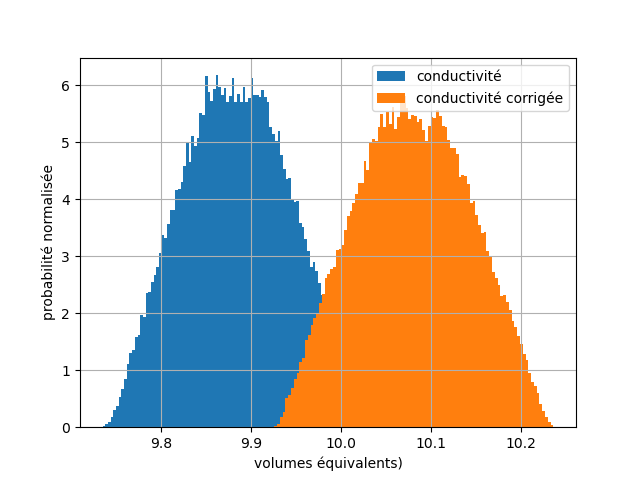

In [7]:
plt.figure()
plt.hist(V_eq1_store,bins=100, density=True, stacked=True, label="conductivité")
plt.hist(V_eq2_store,bins=100, density=True, stacked=True, label="conductivité corrigée")
plt.xlabel("volumes équivalents)")
plt.ylabel("probabilité normalisée")
plt.grid(True)
plt.legend()
plt.show()

## Analyse des résultats de groupe

### Volume équivalent moyen et incertitude-type associée

In [8]:
Gr1_Veq1=[9.27, 10.02, 10.21, 9.83, 9.63, 10.13]
Gr2_Veq1=[9.74, 10.31, 9.79]
Gr1_Veq2=[9.20, 10.67, 10.60, 10.15, 10.35, 10.89]
Gr2_Veq2=[10.13, 9.96]

Gr1_Veq1_moy = np.mean(Gr1_Veq1)
u_Gr1_Veq1_moy = np.std(Gr1_Veq1, ddof=1)
Gr2_Veq1_moy = np.mean(Gr2_Veq1)
u_Gr2_Veq1_moy = np.std(Gr2_Veq1, ddof=1)

Gr1_Veq2_moy = np.mean(Gr1_Veq2)
u_Gr1_Veq2_moy = np.std(Gr1_Veq2, ddof=1)
Gr2_Veq2_moy = np.mean(Gr2_Veq2)
u_Gr2_Veq2_moy = np.std(Gr2_Veq2, ddof=1)

print("Le volume équivalent mesuré par conductivité par le groupe 1 est :", format(Gr1_Veq1_moy, "#.2f"), "+/-", format(u_Gr1_Veq1_moy, "#.2e"), "mL")
print("Le volume équivalent mesuré par conductivité corrigée par le groupe 1 est :", format(Gr1_Veq2_moy, "#.2f"), "+/-", format(u_Gr1_Veq2_moy, "#.2e"), "mL")
print("***")
print("Le volume équivalent mesuré par conductivité par le groupe 2 est :", format(Gr2_Veq1_moy, "#.2f"), "+/-", format(u_Gr2_Veq1_moy, "#.2e"), "mL")
print("Le volume équivalent mesuré par conductivité corrigée par le groupe 2 est :", format(Gr2_Veq2_moy, "#.2f"), "+/-", format(u_Gr2_Veq2_moy, "#.2e"), "mL")

Le volume équivalent mesuré par conductivité par le groupe 1 est : 9.85 +/- 3.53e-01 mL
Le volume équivalent mesuré par conductivité corrigée par le groupe 1 est : 10.31 +/- 6.02e-01 mL
***
Le volume équivalent mesuré par conductivité par le groupe 2 est : 9.95 +/- 3.16e-01 mL
Le volume équivalent mesuré par conductivité corrigée par le groupe 2 est : 10.05 +/- 1.20e-01 mL


### Écarts normalisés et points aberrants

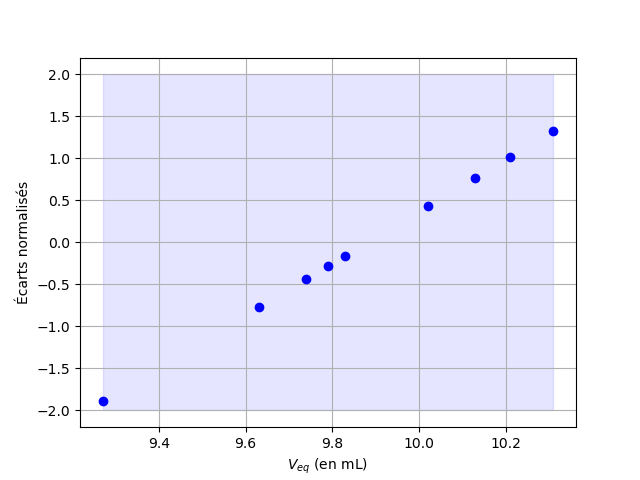

In [9]:
Gr_all_Veq1 = Gr1_Veq1 + Gr2_Veq1

res_1 = np.array(Gr_all_Veq1)-np.mean(Gr_all_Veq1)  # on teste l'écart sur Veq1 entre les données mesurées par le groupe 1 et la valeur moyenne calculée
En_1 = res_1/np.std(Gr_all_Veq1, ddof=1) # on calcule le z-score

plt.figure()
plt.plot(Gr_all_Veq1, En_1, 'bo')             # écarts normalisés
plt.fill_between([np.min(Gr_all_Veq1), np.max(Gr_all_Veq1)], y1 = -2, y2 = 2, color = 'blue', alpha = .1)    # pour mieux visualiser le domaine des En acceptables
plt.xlabel(r'$V_{eq}$ (en mL)')
plt.ylabel("Écarts normalisés")
plt.grid()
plt.show()

Aucun point aberrant n'est détecté, même si le premier est limite.

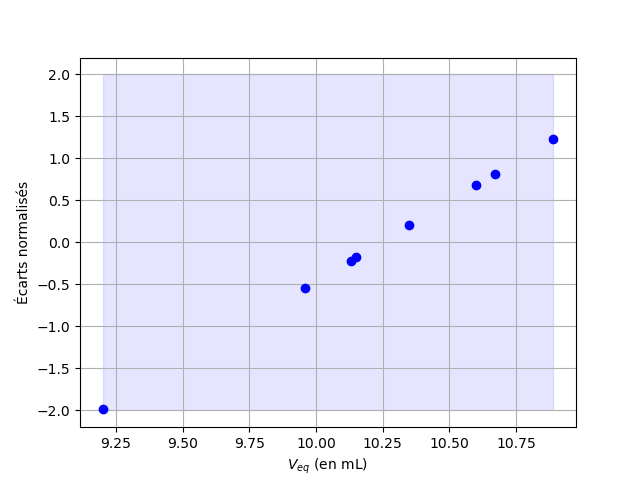

In [10]:
Gr_all_Veq2 = Gr1_Veq2 +Gr2_Veq2

res_2 = np.array(Gr_all_Veq2)-np.mean(Gr_all_Veq2)  # on teste l'écart sur Veq2 entre les données mesurées par les groupes et la valeur moyenne calculée
En_2 = res_2/np.std(Gr_all_Veq2, ddof=1) # on calcule le z-score

plt.figure()
plt.plot(Gr_all_Veq2, En_2, 'bo')             # écarts normalisés
plt.fill_between([np.min(Gr_all_Veq2), np.max(Gr_all_Veq2)], y1 = -2, y2 = 2, color = 'blue', alpha = .1)    # pour mieux visualiser le domaine des En acceptables
plt.xlabel(r'$V_{eq}$ (en mL)')
plt.ylabel("Écarts normalisés")
plt.grid()
plt.show()

Le premier point tracé semble trop limite et doit donc être retiré de notre analyse ce qui est fait dans la partie suivante.

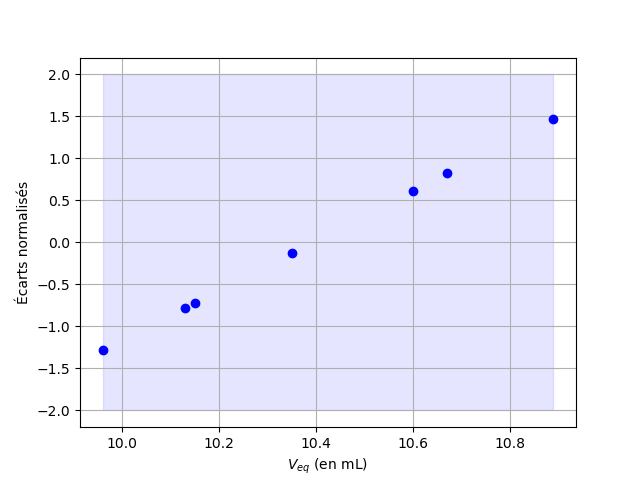

In [11]:
Gr_all_Veq2 = Gr1_Veq2[1:] + Gr2_Veq2

res_2 = np.array(Gr_all_Veq2)-np.mean(Gr_all_Veq2)  # on teste l'écart sur Veq2 entre les données mesurées par les groupes et la valeur moyenne calculée
En_2 = res_2/np.std(Gr_all_Veq2, ddof=1) # on calcule le z-score

plt.figure()
plt.plot(Gr_all_Veq2, En_2, 'bo')             # écarts normalisés
plt.fill_between([np.min(Gr_all_Veq2), np.max(Gr_all_Veq2)], y1 = -2, y2 = 2, color = 'blue', alpha = .1)    # pour mieux visualiser le domaine des En acceptables
plt.xlabel(r'$V_{eq}$ (en mL)')
plt.ylabel("Écarts normalisés")
plt.grid()
plt.show()

In [12]:
print("Le volume équivalent mesuré par conductivité par la classe est :", format(np.mean(Gr_all_Veq1), "#.2f"), "+/-", format(np.std(Gr_all_Veq1, ddof=1), "#.2e"), "mL")
print("Le volume équivalent mesuré par conductivité corrigée par la classe est :", format(np.mean(Gr_all_Veq2), "#.2f"), "+/-", format(np.std(Gr_all_Veq2, ddof=1), "#.2e"), "mL")

Le volume équivalent mesuré par conductivité par la classe est : 9.88 +/- 3.24e-01 mL
Le volume équivalent mesuré par conductivité corrigée par la classe est : 10.39 +/- 3.38e-01 mL
